<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#elspot" data-toc-modified-id="elspot-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>elspot</a></span></li><li><span><a href="#NAB" data-toc-modified-id="NAB-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>NAB</a></span></li></ul></li><li><span><a href="#algorithms" data-toc-modified-id="algorithms-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>algorithms</a></span><ul class="toc-item"><li><span><a href="#table-5" data-toc-modified-id="table-5-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>table 5</a></span></li></ul></li></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set_style(style='white') 

from tqdm.auto import tqdm

In [78]:
import json

## Data

### elspot

We collected NordPool’s Elspot data from January 2016 to
September 2018

which contains hourly spot prices, the vol-
ume of electricity (demand and production), price area, and
timestamp

currency? just use EUR

https://www.nordpoolgroup.com/historical-market-data/

In [38]:
prices = []
for year in [2016, 2017, 2018]:
    prices.append(pd.read_csv(f'price{year}.csv', header=2, decimal=","))
prices = pd.concat(prices)

In [53]:
volumes = []
for year in [2016, 2017, 2018]:
    volumes.append(pd.read_csv(f'volume{year}.csv', header=3, decimal=","))
volumes = pd.concat(volumes)

In [54]:
prices.shape, volumes.shape

((26307, 20), (26307, 35))

In [55]:
prices.head()

,Unnamed: 0,Hours,SYS,SE1,SE2,SE3,SE4,FI,DK1,DK2,Oslo,Kr.sand,Bergen,Molde,Tr.heim,Tromsø,EE,LV,LT,FRE
0,01-01-2016,00 - 01,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39,28.11,28.11,NaN
1,01-01-2016,01 - 02,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,NaN
2,01-01-2016,02 - 03,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,NaN
3,01-01-2016,03 - 04,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,NaN
4,01-01-2016,04 - 05,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,NaN


In [56]:
volumes.head()

,Unnamed: 0,Hours,Turnover at system price,NO1 Buy,NO1 Sell,NO2 Buy,NO2 Sell,NO3 Buy,NO3 Sell,NO4 Buy,...,DK1 Buy,DK1 Sell,DK2 Buy,DK2 Sell,EE Buy,EE Sell,LV Buy,LV Sell,LT Buy,LT Sell
0,01-01-2016,00 - 01,40180.1,4187.9,1451.4,4564.4,7863.9,2355.9,1485.3,1827.5,...,1295.7,1417.7,1988.5,824.6,729.2,838.4,743.6,435.6,931.9,610.9
1,01-01-2016,01 - 02,39293.8,4073.5,1451.8,4517.4,7573.3,2331.1,1383.4,1813.0,...,1238.4,1447.8,1945.9,807.2,694.1,834.2,708.3,434.3,884.8,559.3
2,01-01-2016,02 - 03,38513.8,3988.8,1445.7,4467.1,7195.2,2311.4,1349.6,1797.6,...,1174.7,1483.5,1895.1,794.4,681.6,835.0,680.8,432.6,850.4,573.1
3,01-01-2016,03 - 04,38126.8,3944.6,1441.5,4450.5,6963.3,2293.1,1333.7,1785.4,...,1115.1,1561.0,1847.0,817.5,675.7,832.8,659.6,432.1,939.1,584.3
4,01-01-2016,04 - 05,37894.3,3946.1,1451.0,4429.1,6864.6,2284.8,1319.2,1776.0,...,1089.2,1587.7,1714.7,844.6,678.0,832.4,659.6,438.9,942.1,585.3


In [57]:
print(prices.info(), volumes.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26307 entries, 0 to 8760
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26307 non-null  object 
 1   Hours       26307 non-null  object 
 2   SYS         26304 non-null  float64
 3   SE1         26304 non-null  float64
 4   SE2         26304 non-null  float64
 5   SE3         26304 non-null  float64
 6   SE4         26304 non-null  float64
 7   FI          26304 non-null  float64
 8   DK1         26304 non-null  float64
 9   DK2         26304 non-null  float64
 10  Oslo        26304 non-null  float64
 11  Kr.sand     26304 non-null  float64
 12  Bergen      26304 non-null  float64
 13  Molde       26304 non-null  float64
 14  Tr.heim     26304 non-null  float64
 15  Tromsø      26304 non-null  float64
 16  EE          26304 non-null  float64
 17  LV          26304 non-null  float64
 18  LT          26304 non-null  float64
 19  FRE         978 non-null  

### NAB

downloading the data from https://github.com/numenta/NAB/tree/master/data

* machine_temperature_system_failure.csv
* speed7578.csv
* ambient_temperature_system_failure.csv
* nyc_taxi.csv

In [94]:
# !curl -O https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/machine_temperature_system_failure.csv
# !curl -O https://raw.githubusercontent.com/numenta/NAB/master/data/realTraffic/speed_7578.csv
# !curl -O https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/ambient_temperature_system_failure.csv
# !curl -O https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv
# !curl -O https://raw.githubusercontent.com/numenta/NAB/master/labels/combined_windows.json

In [95]:
with open('combined_windows.json', 'r') as f:
    labels = json.load(f)

In [101]:
mt = pd.read_csv('machine_temperature_system_failure.csv', parse_dates=[0])
sp = pd.read_csv('speed_7578.csv', parse_dates=[0])
at = pd.read_csv('ambient_temperature_system_failure.csv', parse_dates=[0])
nt = pd.read_csv('nyc_taxi.csv', parse_dates=[0])

In [102]:
mt.head()

,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836


In [103]:
sp.head()

,timestamp,value
0,2015-09-08 11:39:00,73
1,2015-09-08 11:44:00,62
2,2015-09-08 11:59:00,66
3,2015-09-08 12:19:00,69
4,2015-09-08 12:24:00,65


In [104]:
at.head()

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551


In [105]:
nt.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


seems good

> map labels

In [142]:
obj2name = [
    (mt, 'realKnownCause/machine_temperature_system_failure.csv'),
    (sp, 'realTraffic/speed_7578.csv'),
    (at, 'realKnownCause/ambient_temperature_system_failure.csv'),
    (nt, 'realKnownCause/nyc_taxi.csv'),
]

In [146]:
for ds_obj, dataset in obj2name:
    ds_obj['anomaly'] = 0

    for w in labels[dataset]:
        anomalies_mask = (ds_obj['timestamp'] >= w[0]) & (ds_obj['timestamp'] <= w[1])
        ds_obj.loc[anomalies_mask, 'anomaly'] = 1

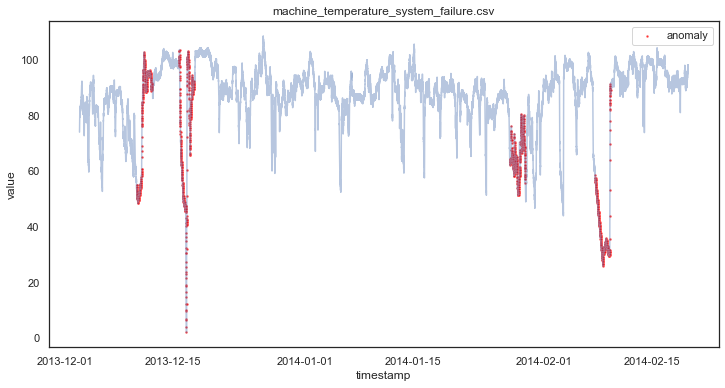

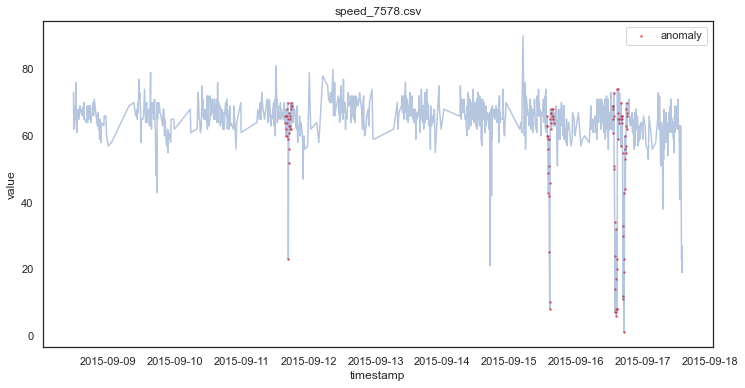

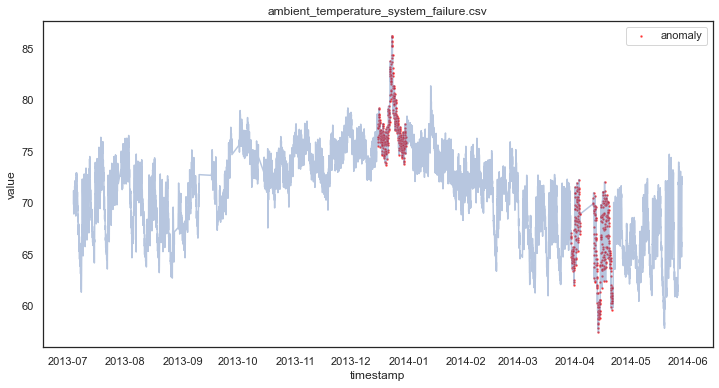

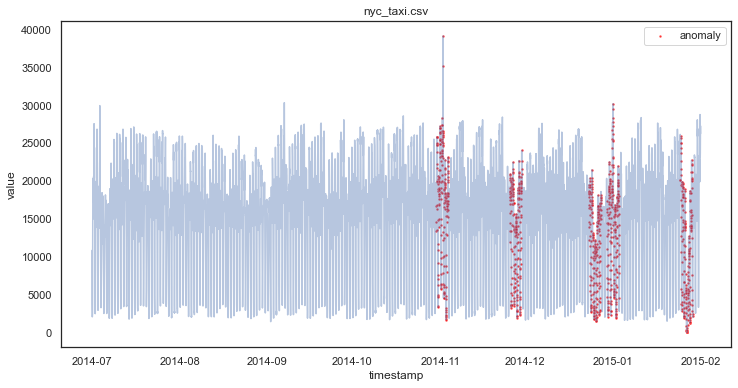

In [151]:
for ds_obj, dataset in obj2name:
    fig,axs=plt.subplots(figsize=(12, 6))
    sns.lineplot(x='timestamp', y='value', data=ds_obj, alpha=0.4)
    sns.scatterplot(x='timestamp', y='value', data=ds_obj[ds_obj['anomaly']==1],
                    color='red', label='anomaly', alpha=0.8, s=6)
#     plt.title('Machine temperature system failure anomalies');
    plt.title(dataset.split('/')[-1])
    plt.show()

## algorithms

need to repro
* Table 3 for elspot
* Table 4 and Table 5

### table 5

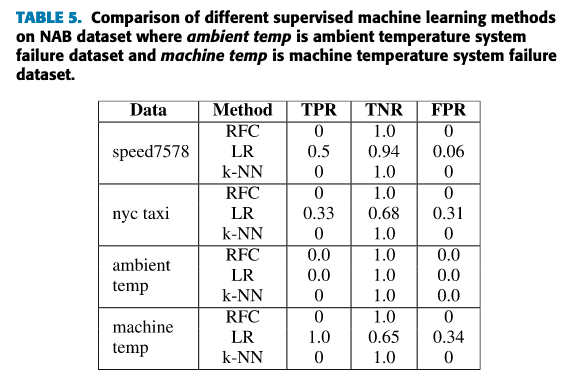

Logistic regression (LR) captured some outliers, but the Random
Forest classifier (RFC) and k-NN could not classify outliers
correctly in the test sets.

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [190]:
# https://stackoverflow.com/a/31351145
def tpr_tnr(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1

    # https://en.wikipedia.org/wiki/Sensitivity_and_specificity 
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    FPR = FP/(FP+TN)
    return TPR, TNR, FPR

In [202]:
timestamp = 'timestamp'
target = 'anomaly'
current_value = 'value'

> example for 1 model

In [198]:
X = mt.copy()

In [199]:
model = RandomForestClassifier(random_state=123)

In [219]:
X_train, X_test, y_train, y_test = train_test_split(
    X.drop(columns=[target, timestamp]), X[target],
    test_size=0.33, random_state=42,
    stratify=X[target],
)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [223]:
y_test.value_counts()/len(y_test)

0    0.9
1    0.1
Name: anomaly, dtype: float64

In [204]:
model.fit(X_train, y_train);

In [216]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # proba of the positive class

In [226]:
TPR, TNR, FPR = tpr_tnr(y_actual=y_test, y_hat=y_pred)
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)

> Table 4

In [238]:
methods = {
    'RFC': RandomForestClassifier(),
    'LR': LogisticRegression(),
    'k-NN': KNeighborsClassifier(),
}
datasets = {
    'speed7578': sp,
    'nyc taxi': nt,
    'ambient temp': at,
    'machine temp': mt,
}

In [239]:
result_t4 = []
for ds_name, X in datasets.items():
    for method_name, model in methods.items():
        X_train, X_test, y_train, y_test = train_test_split(
            X.drop(columns=[target, timestamp]), X[target],
            test_size=0.33, random_state=42,
            stratify=X[target],
        )
        X_train = X_train.reset_index(drop=True)
        X_test = X_test.reset_index(drop=True)
        y_train = y_train.reset_index(drop=True)
        y_test = y_test.reset_index(drop=True)
        
        model.fit(X=X_train, y=y_train);
        y_pred = model.predict(X_test)
        TPR, TNR, FPR = tpr_tnr(y_actual=y_test, y_hat=y_pred)
        result_t4.append([ds_name, method_name, TPR, TNR, FPR])
        
result_t4 = pd.DataFrame(result_t4, columns=['Data', 'Method', 'TPR', 'TNR', 'FPR'])

In [240]:
result_t4

,Data,Method,TPR,TNR,FPR
0,speed7578,RFC,0.184211,0.997006,0.002994
1,speed7578,LR,0.210526,0.997006,0.002994
2,speed7578,k-NN,0.210526,0.997006,0.002994
3,nyc taxi,RFC,0.114035,0.919713,0.080287
4,nyc taxi,LR,0.000000,1.000000,0.000000
5,nyc taxi,k-NN,0.023392,0.992167,0.007833
6,ambient temp,RFC,0.266667,0.918481,0.081519
7,ambient temp,LR,0.000000,1.000000,0.000000
8,ambient temp,k-NN,0.191667,0.979620,0.020380
9,machine temp,RFC,0.445928,0.937398,0.062602
